In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#sns.set_theme()
#sns.set_context('paper')

%matplotlib inline

In [46]:
def parse_dump(dump):
    ts = dump.get('ts')
    # z0_orig = dump.get('z0_orig')
    true_zt = dump.get('true_zt')
    true_zt_chaos = dump.get('true_zt_chaos')
    pred_zt = dump.get('pred_zt')
    pred_zt_chaos = dump.get('pred_zt_chaos')

    return ts, true_zt, true_zt_chaos, pred_zt, pred_zt_chaos

def parse_dump_w_var(dump):
    ts = dump.get('ts')
    # z0_orig = dump.get('z0_orig')
    true_zt = dump.get('true_zt')
    true_zt_chaos = dump.get('true_zt_chaos')
    pred_zt = dump.get('pred_zt')
    pred_zt_chaos = dump.get('pred_zt_chaos')
    var_zt = dump.get('var_zt')

    return ts, true_zt, true_zt_chaos, pred_zt, var_zt, pred_zt_chaos

In [151]:
def trace_plot(t, y, ax, y_std=None, kind='region', color='black', min_y=-np.inf, max_y=np.inf):
    '''
    Arguments:
        zt: Assumes zeroth dimension is number of samples.
        ax: Matplotlib Axis
        pos: Positive quantity flag (for range bounds)
    '''
    assert kind in ['region', 'bound']

    mu = np.mean(y, axis=0)
    if y_std is None:
        std = np.std(y, axis=0)
    else:
        std = 1000 * y_std
        
    ax.plot(t, mu, c=color)
    
    if y.shape[0] == 1 and y_std is None:
        return

    lower = np.clip(mu - 2. * std, min_y, max_y)
    upper = np.clip(mu + 2. * std, min_y, max_y)
    
    if kind == 'region':
        ax.fill_between(t, lower, upper, color=color, alpha=0.3)
    elif kind == 'bound':
        ax.plot(np.array([t, t]).T, np.array([lower, upper]).T, c=color, dashes=[6,2])
    else:
        raise NotImplementedError

def load_dump_and_plot(ax, dump_path, w_var=False):
    dump = torch.load(dump_path)
    if w_var:
        ts, true_zt, true_zt_chaos, pred_zt, var_zt, pred_zt_chaos = parse_dump_w_var(dump)
        print(np.shape(var_zt))
        print(np.shape(pred_zt))
    else:
        ts, true_zt, true_zt_chaos, pred_zt, pred_zt_chaos = parse_dump(dump)
        
    i = 2
    b = 1
    dim = 1
    trace_plot(ts, true_zt[i,:,0,b,dim].unsqueeze(0).numpy(), ax, color=(.2,.2,.2))
    if w_var:
        trace_plot(ts, pred_zt[:,i,:,0,b,dim].numpy(), ax, 
                   y_std=var_zt[i,:,0,b,dim].numpy(), color='blue')
    else:
        trace_plot(ts, pred_zt[:,i,:,0,b,dim].numpy(), ax, color='blue')
        
    trace_plot(ts, true_zt_chaos[:,i,:,0,b,dim].numpy(), ax, color=(.5,.5,.5))
        
def make_epistemic_vs_output():
    swag_dump_path = None
    de_dump_path = None
    output_unc_dump_path = "../../data.pt"
    
    fig, axs = plt.subplots(ncols=3, figsize=(15,5))
    load_dump_and_plot(axs[0], output_unc_dump_path, w_var=True)
    
    plt.show()
        
def make_plot(dump_path):
    dump = torch.load(dump_path)
    ts, true_zt, true_zt_chaos, pred_zt, pred_zt_chaos = parse_dump(dump)
    
    print(np.shape(true_zt_chaos))
    print(np.shape(pred_zt_chaos))
    print(np.shape(pred_zt))
    
    for i in range(25):
        for b in range(2):
            for dim in range(2):
                fig, ax = plt.subplots()
                trace_plot(ts, true_zt[i,:,0,b,dim].unsqueeze(0).numpy(), ax, color=(.2,.2,.2))
                trace_plot(ts, true_zt_chaos[:,i,:,0,b,dim].numpy(), ax, color=(.5,.5,.5))
                trace_plot(ts, pred_zt_chaos[:,i,:,0,b,dim].numpy(), ax, color='red')
                trace_plot(ts, pred_zt[:,i,:,0,b,dim].numpy(), ax, color='blue')

                plt.show()
                plt.close()
                
        print("\n\n\n\n\n\n\n\n\n\n\n\n")

torch.Size([25, 334, 2, 2, 2])
torch.Size([1, 25, 334, 2, 2, 2])


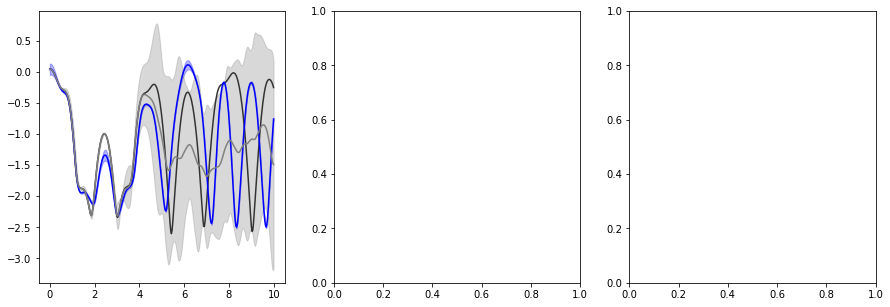

In [152]:
make_epistemic_vs_output()